In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
393,60,42000,1
202,39,134000,1
290,39,134000,1
195,34,43000,0
234,38,112000,0


# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Purchased',axis = 1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # hum test ek hi se hai but transform dono ko krte hai
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns) #To convert it in dataframe from numpy array
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [10]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [11]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect Of Scaling

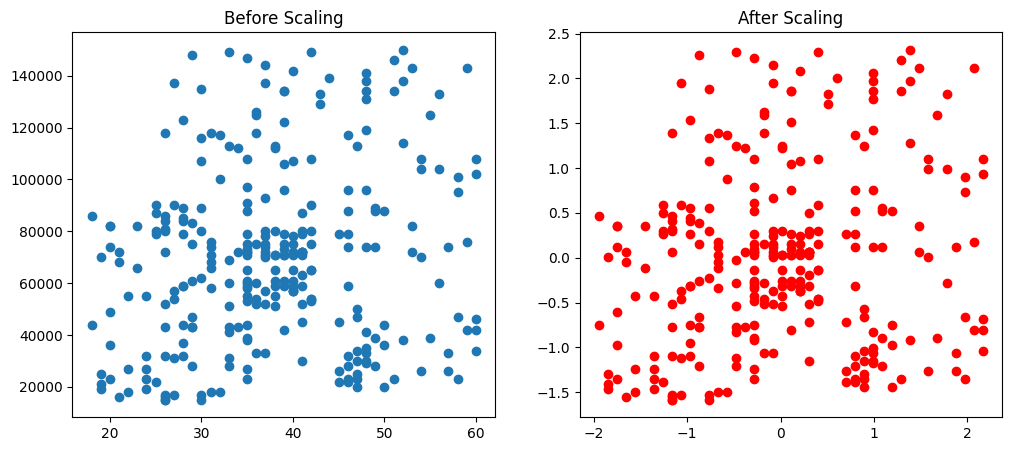

In [12]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x=X_train['Age'],y=X_train['EstimatedSalary'])
ax2.scatter(x=X_train_scaled['Age'],y=X_train_scaled['EstimatedSalary'],color='red')
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
plt.show()

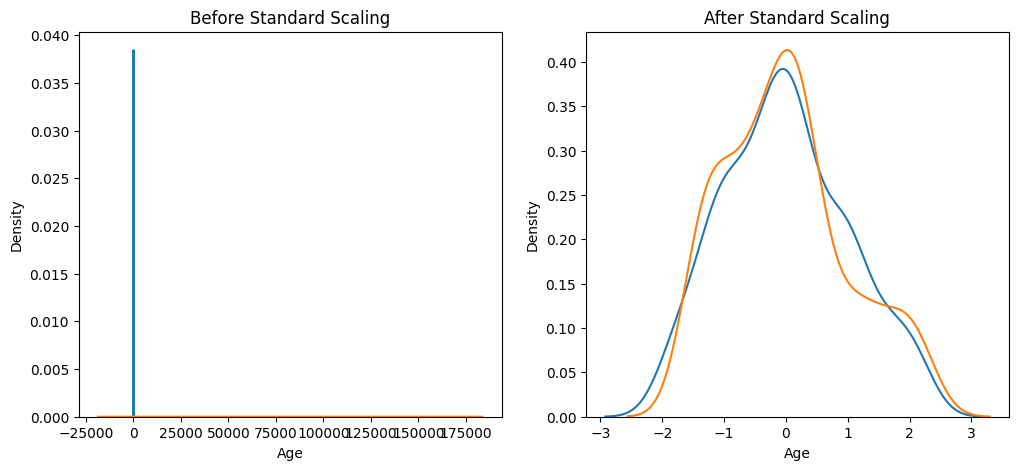

In [13]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
#before Scaling
ax1.set_title('Before Standard Scaling')
sns.kdeplot(x=X_train['Age'],ax=ax1)
sns.kdeplot(x=X_train['EstimatedSalary'],ax=ax1)
#after Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x=X_train_scaled['Age'],ax=ax2)
sns.kdeplot(x=X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# Comparison Of Distribution

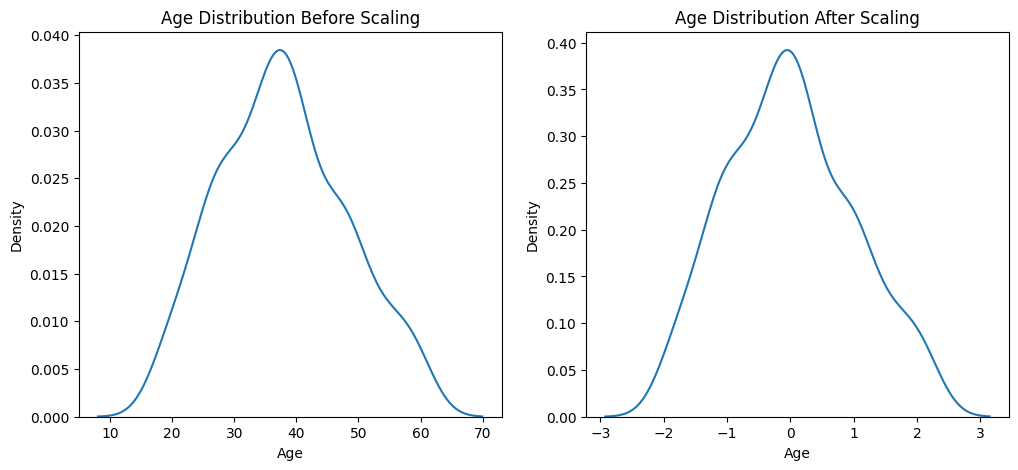

In [14]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
#before Scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
#After Scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()


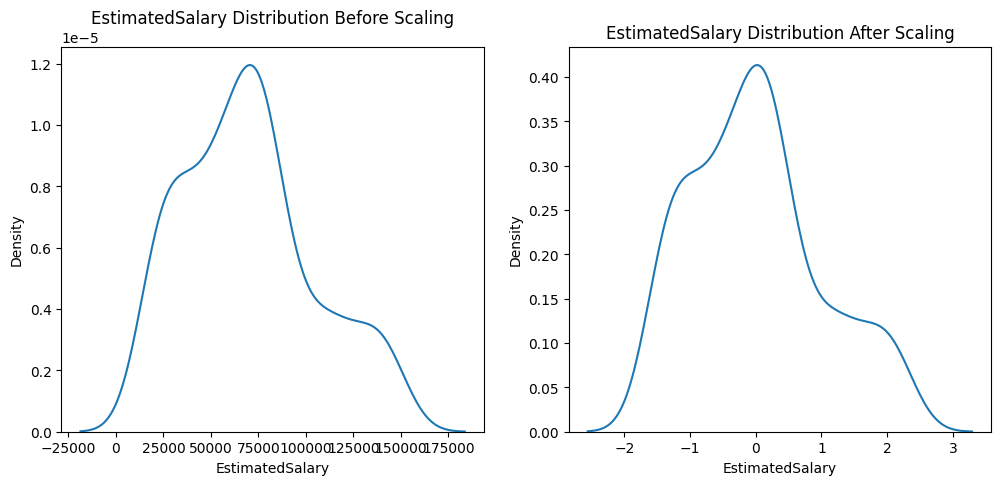

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
#before Scaling
ax1.set_title('EstimatedSalary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
#After Scaling
ax2.set_title('EstimatedSalary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

# Why Scaling Is Important ...?..

In [ ]:
#before doing logistic regression Scaling is important
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg_scaled = LogisticRegression()
log_reg.fit(X_train,Y_train)
log_reg_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Before Scaling',accuracy_score(Y_test,y_pred))
print('Accuracy After Scaling',accuracy_score(Y_test,y_pred_scaled))

Accuracy Before Scaling 0.875
Accuracy After Scaling 0.8666666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect Of Outliers

In [ ]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


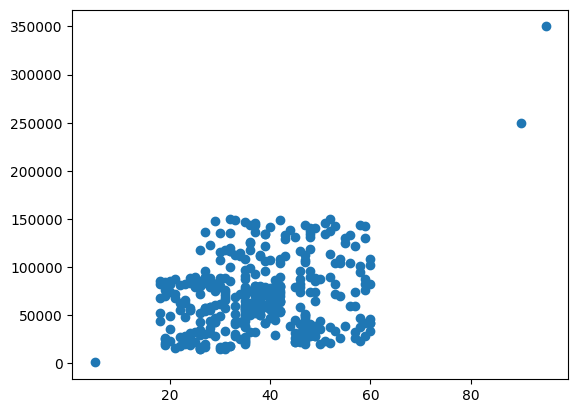

In [ ]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Purchased',axis = 1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape,X_test.shape

((282, 2), (121, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # hum test ek hi se hai but transform dono ko krte hai
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns) #To convert it in dataframe from numpy array
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,0.0
std,1.0,1.0
min,-3.0,-1.9
25%,-0.7,-0.7
50%,-0.1,-0.0
75%,0.7,0.5
max,4.7,5.1


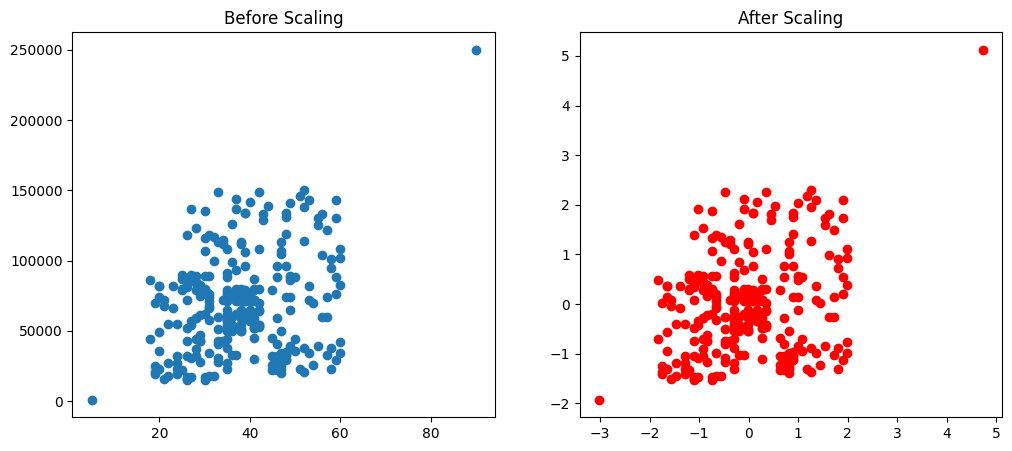

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x=X_train['Age'],y=X_train['EstimatedSalary'])
ax2.scatter(x=X_train_scaled['Age'],y=X_train_scaled['EstimatedSalary'],color='red')
ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
plt.show()

In [ ]:
# Hence Outlier are not affeted by standardization